In [1]:
# 6.2 Term Project Milestone 1
# Data Selection and EDA
## Justin Wisniewski

In [2]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the Insurance Claim dataset
df=pd.read_csv("insurance_data.csv")

In [4]:
# Display the first 5 rows of data
df.head(5)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
# Identify missing values within columns
# There are missing values within the age and region column
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
# Dropping index and patientID columns
df = df.drop(['index','PatientID'], axis=1)
df.shape

(1340, 9)

In [7]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

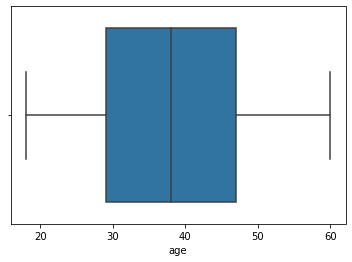

In [9]:
# Use boxplot to identify age range of claim submissions, as well as any outliers that may exist
sns.boxplot(df['age'])

In [10]:
# Fill in missing values in age column with mean
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
# Fill missing values in region column with the most amount of unique value in data
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [12]:
df.isna().sum().sum()

0

In [13]:
# Split numeric and categoric features to make it easy for data preprocessing
numeric_columns = df.select_dtypes(exclude = ["object"])
numeric_columns

,age,bmi,bloodpressure,children,claim
0,39.000000,23.2,91,0,1121.87
1,24.000000,30.1,87,0,1131.51
2,38.078652,33.3,82,0,1135.94
3,38.078652,33.7,80,0,1136.40
4,38.078652,34.1,100,0,1137.01
...,...,...,...,...,...
1335,44.000000,35.5,88,0,55135.40
1336,59.000000,38.1,120,1,58571.07
1337,30.000000,34.5,91,3,60021.40
1338,37.000000,30.4,106,0,62592.87


In [14]:
categoric_columns = df.select_dtypes(include = ["object"])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


<AxesSubplot:>

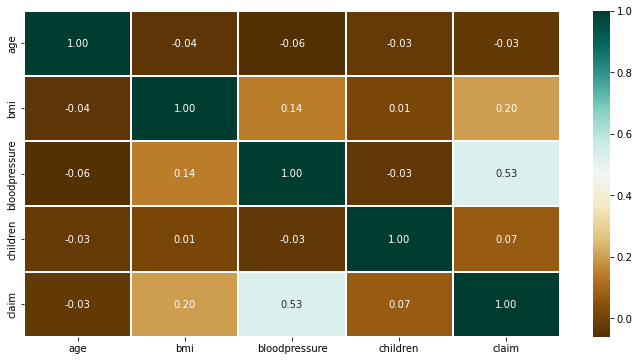

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
    cmap = 'BrBG',
    fmt = '.2f',
    linewidths = 2,
    annot = True)

In [ ]:
# Blood pressure has strongest correlation score to claim cost
# BMI has the second strongest correlation score to claim cost

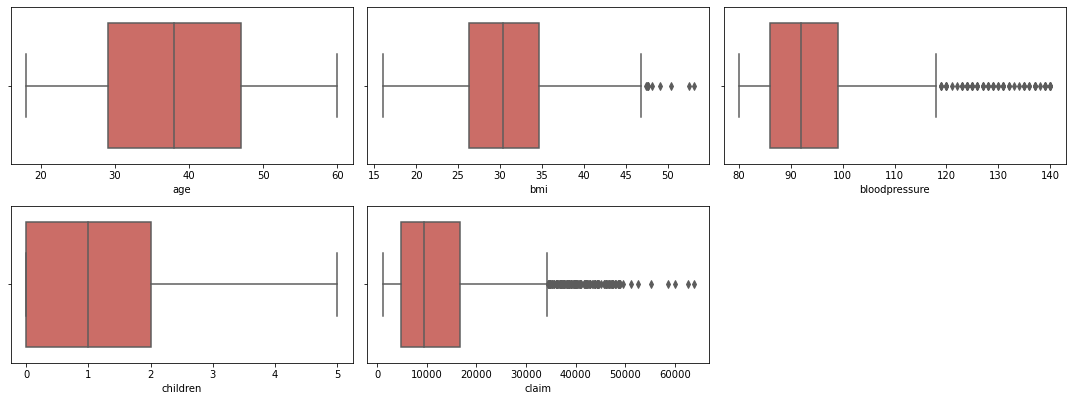

In [16]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=df, palette="hls")
    number += 1
    plt.tight_layout()

In [ ]:
# Outliers in BMI, Blood Pressure, and Claim columns will need to be deleted

C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jwiz3\anaconda\lib\site-p

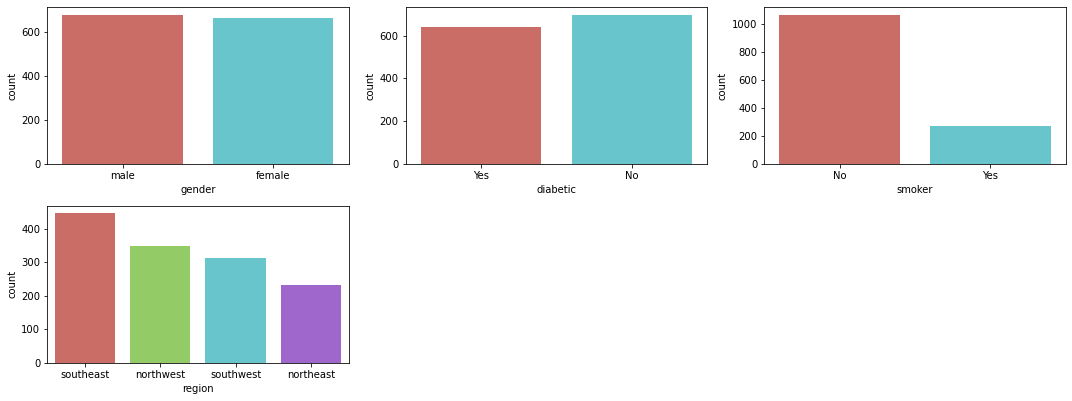

In [17]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    sns.countplot(df[i], palette="hls")
    number += 1
    plt.tight_layout()

In [ ]:
# Male, Not Diabetic, Non-Smoker, and Southeast Region are most common claim submittors

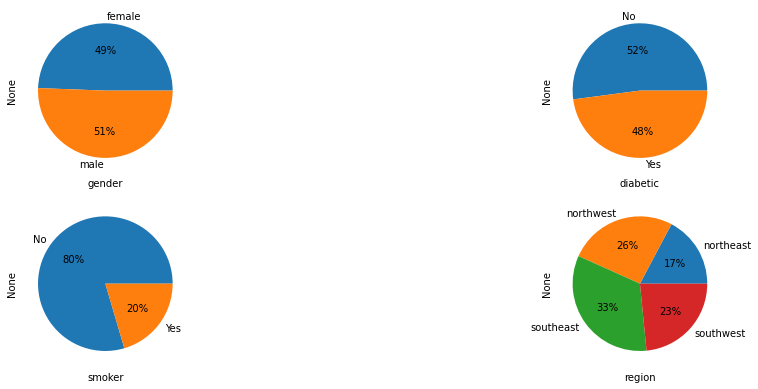

In [18]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 2, number)
    df.groupby(i).size().plot(kind='pie', autopct='%.0f%%')
    plt.xlabel(i)
    number += 1
    plt.tight_layout()

In [ ]:
# Pie chart visualization with percentages for categorical variables